# Loan Default Prediction 

### Problem Statement:
Banks and loans face huge losses due to customers failing to repay their loans. Loan defaulters present a huge challenge for banks and financial insititutions, leading to financial losses whose impact is felt in the economy of the country. Utilizing data driven approaches, this study attempts to predict loan defaulters by analyzing characteristics of loan applicants such as the amount funded, loan amount, current balance etc, and building machine learning classification models.

In [205]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [23]:
df=pd.read_csv(r"C:/Users/Admin/Documents/TR_DataScientistCaseStudy/data/trainData.csv")
dfTest = pd.read_csv(r"C:\Users\Admin\Documents\TR_DataScientistCaseStudy\data\testData.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67563 non-null  int64  
 1   Loan Amount                   66443 non-null  float64
 2   Funded Amount                 67563 non-null  int64  
 3   Funded Amount Investor        67563 non-null  float64
 4   Term                          66683 non-null  float64
 5   Batch Enrolled                67563 non-null  object 
 6   Interest Rate                 67563 non-null  float64
 7   Grade                         67563 non-null  object 
 8   Sub Grade                     67563 non-null  object 
 9   Home Ownership                67563 non-null  object 
 10  Employment Duration           67563 non-null  float64
 11  Verification Status           67563 non-null  object 
 12  Payment Plan                  67563 non-null  object 
 13  L

In [29]:
df.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,...,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0
1,16260670,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,...,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0
2,38160762,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,...,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,...,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,...,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1
5,2974291,6007.0,21017,12645.716080,59.0,BAT5547201,19.319776,C,C4,RENT,...,0.996211,0.334443,0,INDIVIDUAL,0,0,30,92068,16239,1
6,43010981,15451.0,22033,21601.806660,59.0,BAT4271519,7.781144,C,D1,MORTGAGE,...,1.291360,0.188981,0,INDIVIDUAL,62,0,38,48344,37967,0
7,46531426,34465.0,4017,9491.827591,59.0,BAT2136391,6.521254,C,B5,MORTGAGE,...,8.189866,1.111021,0,INDIVIDUAL,71,0,18,100646,21477,0
8,6423521,22807.0,11659,16809.570680,59.0,BAT2136391,7.007668,A,B3,MORTGAGE,...,0.509966,0.710070,0,INDIVIDUAL,76,0,59,393876,13415,0
9,37508238,19783.0,22550,13040.196250,58.0,BAT2136391,13.933021,B,C4,MORTGAGE,...,4.494627,0.488135,0,INDIVIDUAL,87,0,17,182757,38877,0


##### This dataset has:
##### rows: 67563
##### collumns: 35
##### data types: int, float, object

In [30]:
df.shape

(67563, 35)

In [19]:
df[df["Accounts Delinquent"]!=0]

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status


##### All entries have "Accounts Delinquent" as "0"

In [38]:
cat_collumn = df.select_dtypes(include="object")
noncat_collumn = df.select_dtypes(exclude="object")

In [43]:
print("Number of Categorical Collumn: ",len(cat_collumn.columns.tolist()),"\n",cat_collumn.columns.tolist())
print("\n")
print("Number of Non-Categorical Collumn: ",len(noncat_collumn.columns.tolist()),"\n",noncat_collumn.columns.tolist())

Number of Categorical Collumn:  9 
 ['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']


Number of Non-Categorical Collumn:  26 
 ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


### Cleaning Null values

In [83]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

#### Null values in collumn "Loan Amount" and "Term"

In [65]:
df.duplicated().sum()

97

In [84]:
nan_df= df[df.isna().any(axis=1)]
nan_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status


In [85]:
df.fillna(value=df["Loan Amount"].mode()[0],inplace=True)
df.fillna(value=df["Term"].mode()[0],inplace=True)

In [86]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,...,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0
1,16260670,15932.0,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,...,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0
2,38160762,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,...,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,...,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,...,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,18609984,19034.0,7800,9207.727021,59.0,BAT2078974,11.167840,C,B4,RENT,...,5.023079,1.084516,0,INDIVIDUAL,85,0,40,13265,24302,1
67559,61478716,11910.0,21983,10648.403410,58.0,BAT4136152,9.113640,B,A1,RENT,...,4.562045,0.538600,0,INDIVIDUAL,57,0,53,65532,24945,1
67560,4860960,21914.0,15981,23044.056430,59.0,BAT2558388,12.296416,A,A2,MORTGAGE,...,1.343841,1.225884,0,INDIVIDUAL,82,0,17,30131,6149,0
67561,52527924,2962.0,23476,15955.635420,59.0,BAT5547201,12.970257,E,B3,RENT,...,4.027871,37.037358,0,INDIVIDUAL,45,0,31,306139,7609,0


In [87]:
cat_collumn.describe()

,Batch Enrolled,Grade,Sub Grade,Home Ownership,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67563,67563,67563,67563,67563,67563,67563,67563,67563
unique,41,8,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3631,19085,4473,36411,33075,67563,30770,36357,67440


In [93]:
for col in cat_collumn:
    uniVal=df[col].unique()
    print(f'Categories in "{col}" are: {uniVal}')
    print(df[col].value_counts())

Categories in "Batch Enrolled" are: ['BAT1586599' 'BAT1766061' 'BAT2803411' 'BAT2575549' 'BAT5547201'
 'BAT4271519' 'BAT2136391' 'BAT4722912' 'BAT5924421' 'BAT3193689'
 'BAT3873588' 'BAT2428731' 'BAT4694572' 'BAT224923' 'BAT1184694'
 'BAT2252229' 'BAT2522922' 'BAT5489674' 'BAT5629144' 'BAT4136152'
 'BAT2558388' 'BAT5714674' 'BAT5525466' 'BAT5811547' 'BAT2078974'
 'BAT1780517' 'BAT1930365' 'BAT3461431' 'BAT2833642' 'BAT1761981'
 'BAT1104812' 'BAT1135695' 'BAT5341619' 'BAT3865626' 'BAT4808022'
 'BAT2333412' 'BAT2003848' 'BAT5849876' 'BAT4351734' 'BAT3726927'
 'BAT1467036']
BAT3873588    3631
BAT1586599    3148
BAT1104812    3000
BAT2252229    2560
BAT2803411    2428
BAT1780517    2404
BAT1184694    2303
BAT2078974    2294
BAT2575549    2257
BAT4694572    2252
BAT4271519    2054
BAT2558388    1966
BAT3193689    1866
BAT1930365    1848
BAT2136391    1794
BAT2333412    1781
BAT3726927    1777
BAT4136152    1769
BAT5341619    1719
BAT5525466    1712
BAT5489674    1678
BAT5629144    1643
BAT1

In [90]:
noncat_collumn.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.756300e+04,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,...,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.0,67563.000000,6.756300e+04,67563.000000,67563.000000
mean,2.562944e+07,16831.724287,15771.471279,14622.353690,264.927401,11.846197,80536.860599,23.299657,0.327073,0.145657,...,1.143357,59.675290,1.124561,0.021313,71.160443,0.0,146.551056,1.595749e+05,23124.221601,0.092580
std,2.109168e+07,8296.140550,8151.202213,6785.267201,1799.805501,3.718337,45030.404624,8.452596,0.800690,0.473094,...,5.242229,356.879116,3.487361,0.144428,43.312259,0.0,744.870480,1.390519e+05,20912.599969,0.289845
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570975e+06,10124.000000,9268.000000,9832.338931,58.000000,9.297147,51689.843335,16.754965,0.000000,0.000000,...,0.021125,1.629710,0.476128,0.000000,35.000000,0.0,24.000000,5.035550e+04,8157.500000,0.000000
50%,1.791832e+07,15932.000000,13042.000000,12794.974390,59.000000,11.376806,69334.555400,22.659141,0.000000,0.000000,...,0.043398,3.344370,0.780095,0.000000,68.000000,0.0,36.000000,1.183740e+05,16735.000000,0.000000
75%,4.272616e+07,21983.500000,21793.500000,17802.646535,59.000000,14.193533,94609.530325,30.050615,0.000000,0.000000,...,0.071879,5.453803,1.070472,0.000000,105.000000,0.0,46.000000,2.283545e+05,32148.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,15932.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


### Observations:
1. "Payment Plan" has only one unique value meaning that all loans have same payment plan
2. There are two "Application Type" values 
3. There are 3 unique values for "Verification Status"

In [94]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.756300e+04,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,...,67563.000000,67563.000000,67563.000000,67563.000000,67563.000000,67563.0,67563.000000,6.756300e+04,67563.000000,67563.000000
mean,2.562944e+07,16831.724287,15771.471279,14622.353690,264.927401,11.846197,80536.860599,23.299657,0.327073,0.145657,...,1.143357,59.675290,1.124561,0.021313,71.160443,0.0,146.551056,1.595749e+05,23124.221601,0.092580
std,2.109168e+07,8296.140550,8151.202213,6785.267201,1799.805501,3.718337,45030.404624,8.452596,0.800690,0.473094,...,5.242229,356.879116,3.487361,0.144428,43.312259,0.0,744.870480,1.390519e+05,20912.599969,0.289845
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570975e+06,10124.000000,9268.000000,9832.338931,58.000000,9.297147,51689.843335,16.754965,0.000000,0.000000,...,0.021125,1.629710,0.476128,0.000000,35.000000,0.0,24.000000,5.035550e+04,8157.500000,0.000000
50%,1.791832e+07,15932.000000,13042.000000,12794.974390,59.000000,11.376806,69334.555400,22.659141,0.000000,0.000000,...,0.043398,3.344370,0.780095,0.000000,68.000000,0.0,36.000000,1.183740e+05,16735.000000,0.000000
75%,4.272616e+07,21983.500000,21793.500000,17802.646535,59.000000,14.193533,94609.530325,30.050615,0.000000,0.000000,...,0.071879,5.453803,1.070472,0.000000,105.000000,0.0,46.000000,2.283545e+05,32148.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,15932.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


### Observations:
Loan Amount:
1. Average Loan Amount: 16831.72
2. Lowest Loan Amount : 1014.00
3. Maximum Loan Amount: 35000.00

Interest Rate:
1. Average Interest Rate : 11.84%
2. Lowest Interest Rate : 5.32%
3. Maximum Interest Rate : 27.18%

Received Maximum Late fee: 42.61

### Univariate Analysis

In [244]:
# Checking for "Loan Status" distribution throughout the dataset to check for imbalance in dataset.
loanStatus_per= (df["Loan Status"].value_counts()/len(df))*100
print("Loan Status:\n 1 = Defaulter, 0 = Non Defaulters\n")
print(loanStatus_per)

Loan Status:
 1 = Defaulter, 0 = Non Defaulters

0    90.741974
1     9.258026
Name: Loan Status, dtype: float64


#### We can observe that 90.74% of the entries are "non-defaulers" and 9.25% are "defaulters"

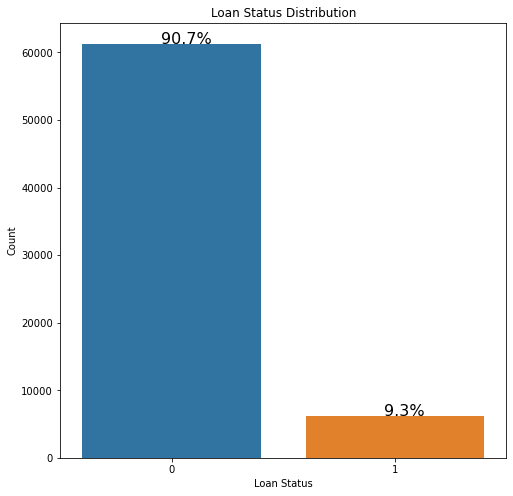

In [110]:
plt.figure(figsize=(8,8))
plot=sns.countplot(data=df, x="Loan Status")
total = len(df["Loan Status"])
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plot.annotate(percentage, (x, y), size = 16)
plt.title("Loan Status Distribution")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

#### The target variable has a huge imbalance hence need to be sampled

ValueError: num must be 1 <= num <= 6, not 7

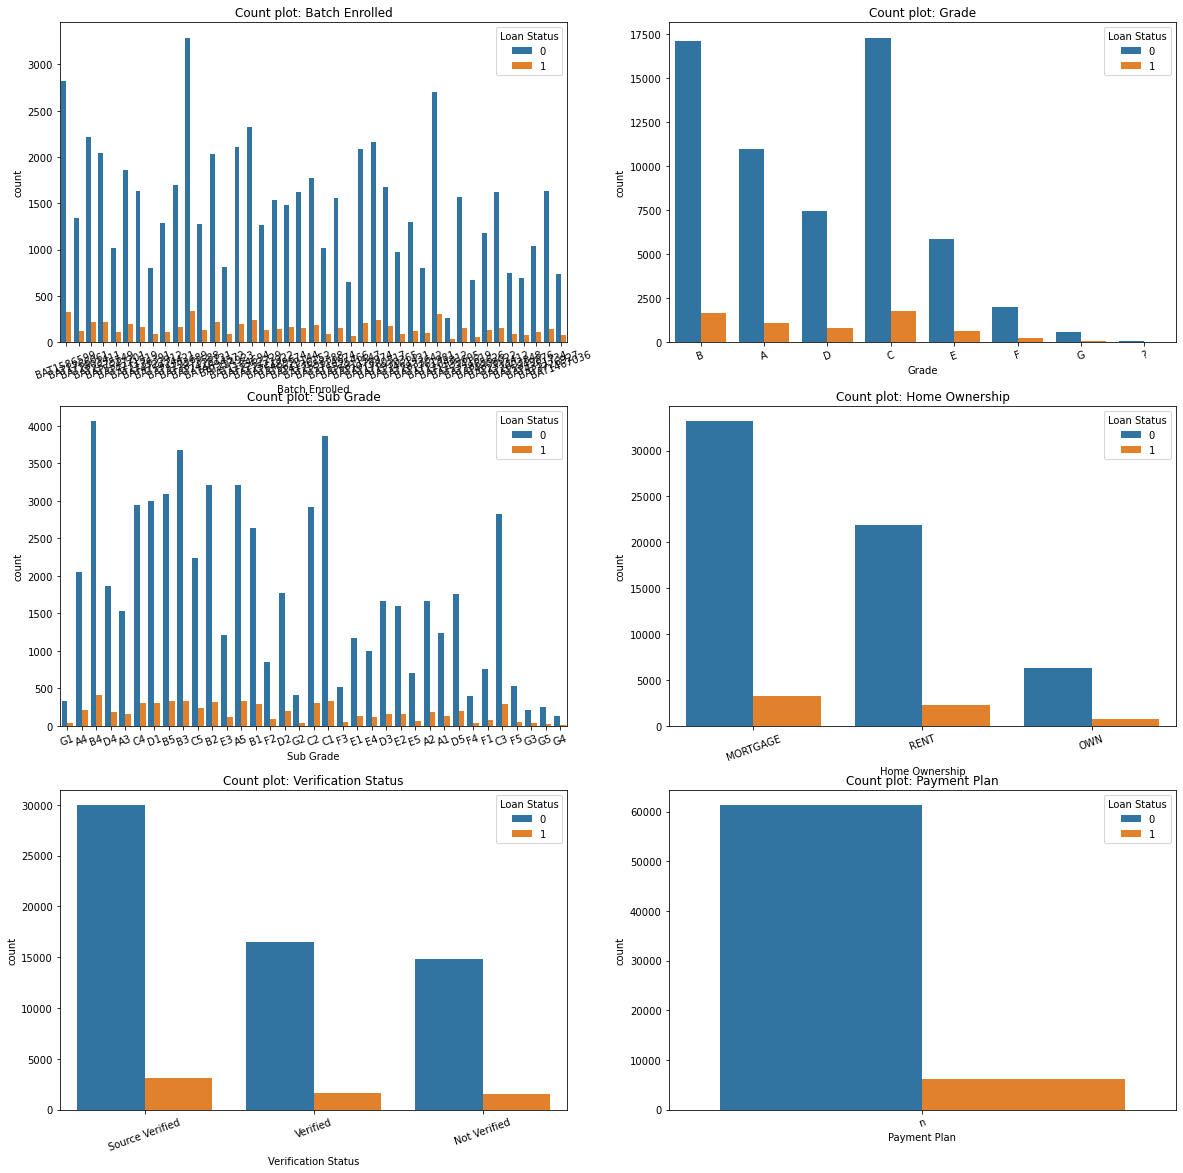

In [134]:
catcol = list(df.select_dtypes(include='object').columns)
plt.figure(figsize=(20, 20))
for i in range(len(catcol)):
    plt.subplot(3,2, (i+1))
    sns.countplot(data=df, x=catcol[i], hue='Loan Status')
    plt.xticks(rotation=20)
    plt.title("Count plot: {}".format(catcol[i]), fontsize=12)
plt.tight_layout()
plt.show()

### Ovservations: 
Most Defaulters where "Source Verified", "MORTGAGE" and are of grade "C" or "B"

### Analyzing continuous variables Loan amount, funded amount and interest rate

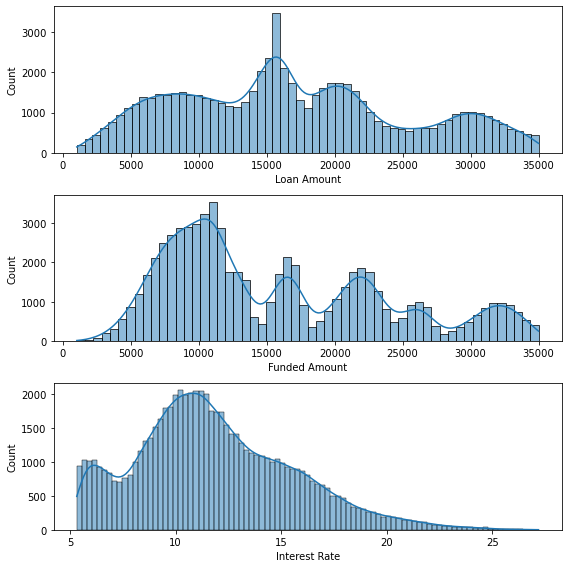

In [147]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
sns.histplot(data=df, x="Loan Amount", kde=True)
plt.subplot(3,1,2)
sns.histplot(data=df, x="Funded Amount", kde=True)
plt.subplot(3,1,3)
sns.histplot(data=df, x="Interest Rate", kde=True)
plt.tight_layout()
plt.show()

From the above histogram we can see that 
1. Loan Amount is fairly symmertical with a few outliers, meaning the requested loan amounts fall within a range and does not deviate much.
2. Funded Amount and Interest Rate are right skewed, with a few outliers.

### Bi Variate Analysis

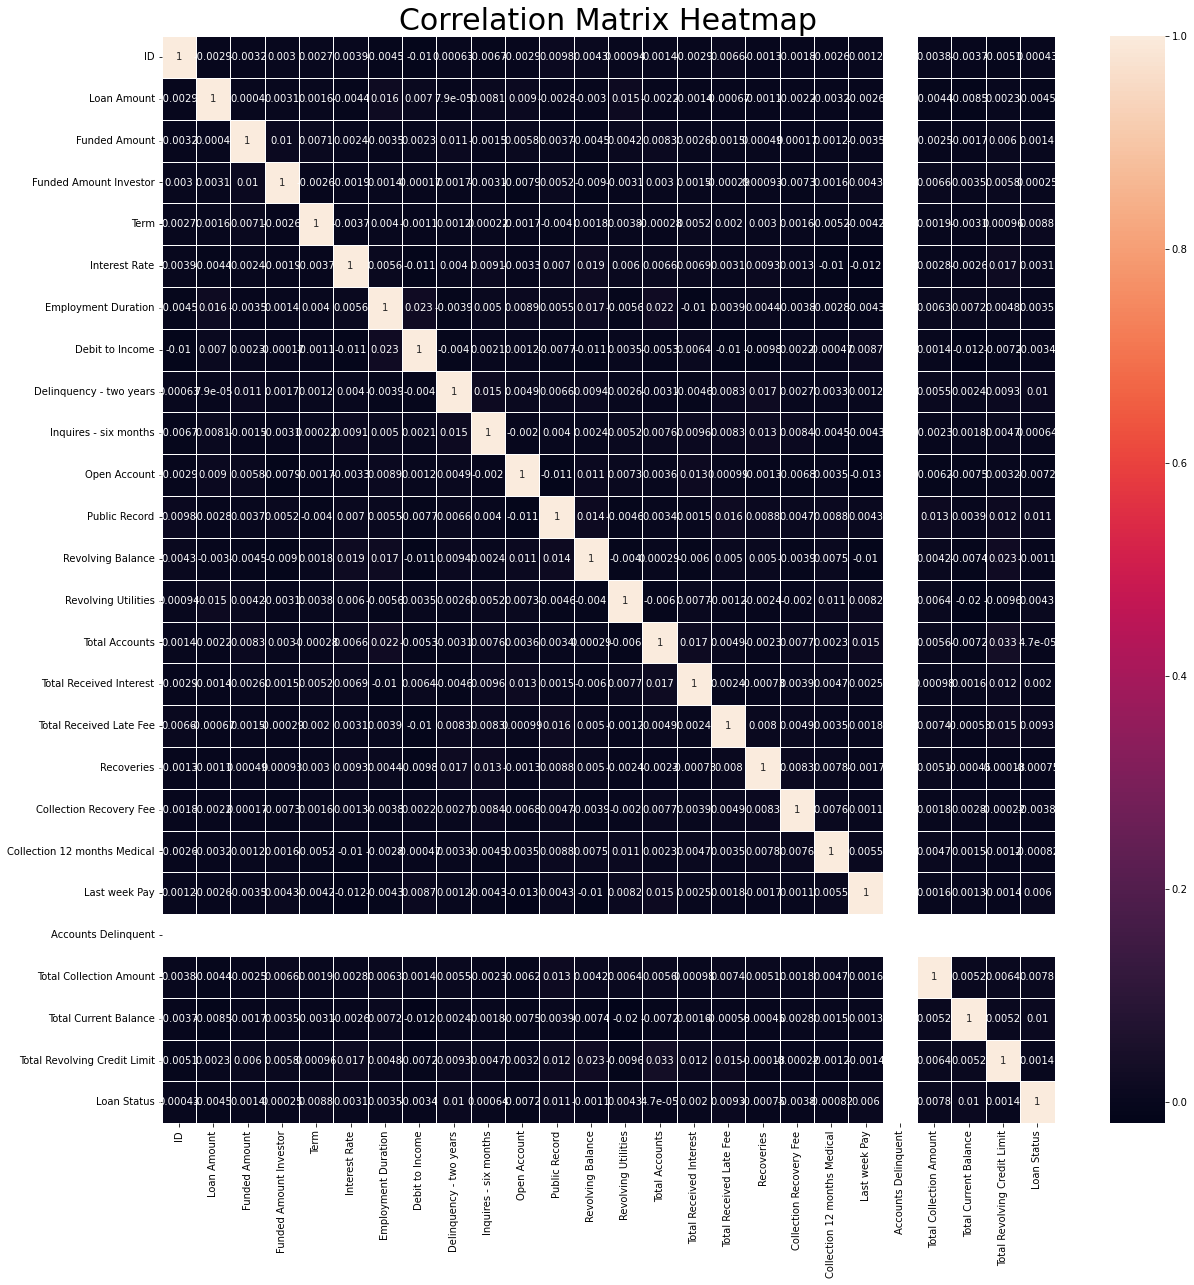

In [161]:
# Checking for correlation
corr= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, linewidths=1,)
plt.title("Correlation Matrix Heatmap",fontsize=30)
plt.show()

### Observation:
1. We can see that there is no correlation between the collumn variables in the dataset. Also, there is not correlation between the target variable "Loan Status" and any of the other collumns.

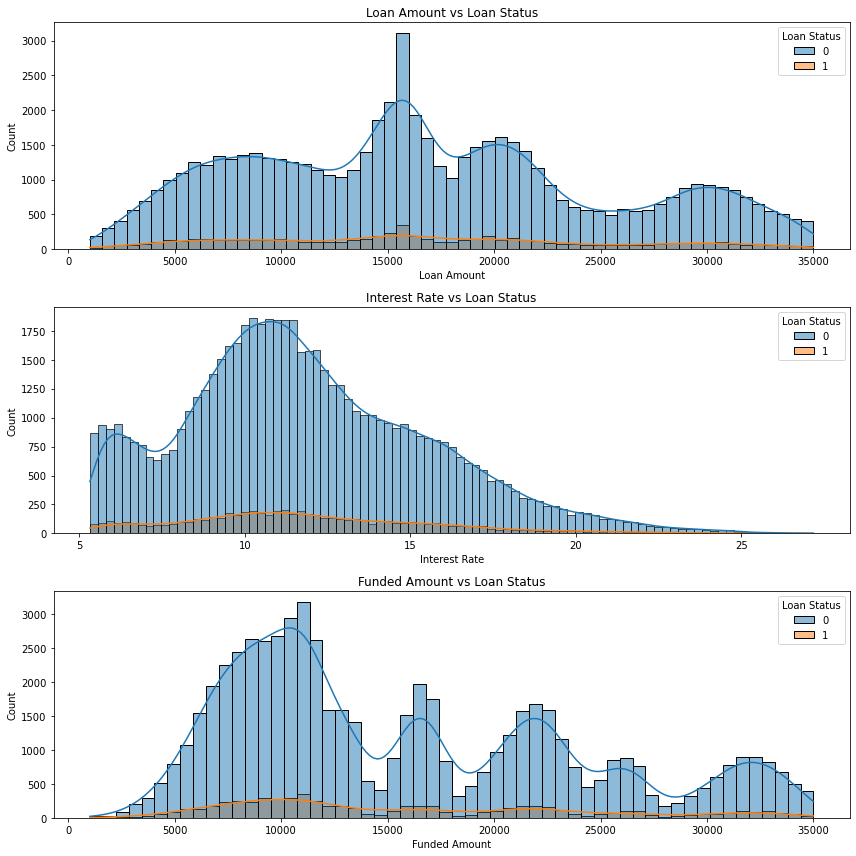

In [180]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
# Distribution of Loan Amount by Loan Status
sns.histplot(data=df, x='Loan Amount', kde=True, hue='Loan Status')
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.title("Loan Amount vs Loan Status")

plt.subplot(3,1,2)
# Distribution of Interest rate by Loan Status
sns.histplot(data=df, x='Interest Rate', kde=True, hue='Loan Status')
plt.xlabel("Interest Rate")
plt.ylabel("Count")
plt.title("Interest Rate vs Loan Status")

plt.subplot(3,1,3)
# Distribution of Funded Amount by Loan Status
sns.histplot(data=df, x='Funded Amount', kde=True, hue='Loan Status')
plt.xlabel("Funded Amount")
plt.ylabel("Count")
plt.title("Funded Amount vs Loan Status")

plt.tight_layout()
plt.show()

### Model Building

In [187]:
# Encoding the categorical collumns using LabelEncoder
le=LabelEncoder()

for col in catcol:
    df[col] = le.fit_transform(df[col])

In [188]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,4,16.200249,2,30,0,...,0.040202,1.005686,0,0,2,0,50,48379,4599,0
1,16260670,15932.0,25543,34092.731820,59.0,6,11.592735,2,3,2,...,5.249225,1.134362,0,0,24,0,582,211574,20791,0
2,38160762,16774.0,9717,7949.140886,58.0,19,10.963143,2,8,0,...,2.846310,1.554686,0,0,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,18,11.372651,1,18,2,...,5.314602,1.047915,0,0,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,19,8.885435,4,2,2,...,4.131232,0.972319,0,0,122,0,2036,501316,22000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,18609984,19034.0,7800,9207.727021,59.0,10,11.167840,3,8,2,...,5.023079,1.084516,0,0,85,0,40,13265,24302,1
67559,61478716,11910.0,21983,10648.403410,58.0,26,9.113640,2,0,2,...,4.562045,0.538600,0,0,57,0,53,65532,24945,1
67560,4860960,21914.0,15981,23044.056430,59.0,17,12.296416,1,1,0,...,1.343841,1.225884,0,0,82,0,17,30131,6149,0
67561,52527924,2962.0,23476,15955.635420,59.0,35,12.970257,5,7,2,...,4.027871,37.037358,0,0,45,0,31,306139,7609,0


In [190]:
# Extracting feature variable
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

#### Sampling the input and output dataset to tackle the issue of class imbalance discussed above

In [195]:
# Sampling
sampler= SMOTE()
sampler.fit(X,y)
X,y=sampler.fit_resample(X,y)

In [196]:
X

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,16554375,33018.000000,11760,8911.377904,59.000000,4,16.200249,2,30,0,...,0.002127,0.040202,1.005686,0,0,2,0,50,48379,4599
1,16260670,15932.000000,25543,34092.731820,59.000000,6,11.592735,2,3,2,...,0.021474,5.249225,1.134362,0,0,24,0,582,211574,20791
2,38160762,16774.000000,9717,7949.140886,58.000000,19,10.963143,2,8,0,...,0.052362,2.846310,1.554686,0,0,82,0,14,313080,25499
3,41860561,12977.000000,32262,10217.109450,59.000000,18,11.372651,1,18,2,...,0.049318,5.314602,1.047915,0,0,129,0,42,98679,15270
4,14155892,5937.000000,22241,13121.033610,59.000000,19,8.885435,4,2,2,...,0.000266,4.131232,0.972319,0,0,122,0,2036,501316,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122611,54866978,11836.648206,8858,10966.855211,58.153982,4,15.566904,4,20,0,...,0.051559,5.236448,0.897051,0,0,125,0,39,324854,11482
122612,36564509,8702.841730,12535,23169.484484,59.000000,7,9.723023,1,19,2,...,0.055690,4.539089,1.015474,0,0,66,0,32,95333,6502
122613,9514667,8875.658910,23302,12803.071048,58.960450,8,7.444402,2,18,2,...,0.063016,5.154047,0.899363,0,0,33,0,34,57884,3138
122614,6954139,23193.963100,18125,14029.245067,58.525600,23,5.578054,5,19,0,...,0.022333,5.906092,0.818958,0,0,76,0,175,341165,9565


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [199]:
# Standardizing the input variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. Random Forest Classifier


In [223]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [203]:
y_pred_rf = model_rf.predict(X_test)

In [206]:
report_rf = classification_report(y_test, y_pred_rf, digits=3)

Classification report of Random Forest Classifier:
               precision    recall  f1-score   support

           0      0.878     0.965     0.919     12262
           1      0.961     0.866     0.911     12262

    accuracy                          0.916     24524
   macro avg      0.920     0.916     0.915     24524
weighted avg      0.920     0.916     0.915     24524



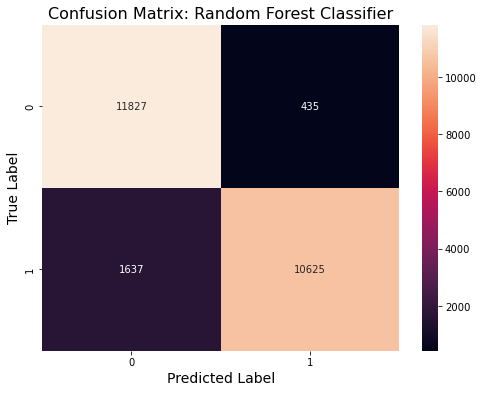

Accuracy Score: 91.55%
Recall Score: 86.65%
F1 Score: 91.12%


In [222]:
print("Classification report of Random Forest Classifier:\n", report_rf)

cm_rf = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix: Random Forest Classifier",size=16)
sns.heatmap(cm_rf, annot=True,fmt='d')
plt.xlabel("Predicted Label",size=14)
plt.ylabel("True Label",size=14)
plt.show()

print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_rf)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_rf)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_rf)*100,2)))

### 2. Decision tree Classifier

In [228]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
y_pred_dt = model_dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, digits=3)

Classification report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0      0.843     0.804     0.823     12262
           1      0.813     0.850     0.831     12262

    accuracy                          0.827     24524
   macro avg      0.828     0.827     0.827     24524
weighted avg      0.828     0.827     0.827     24524



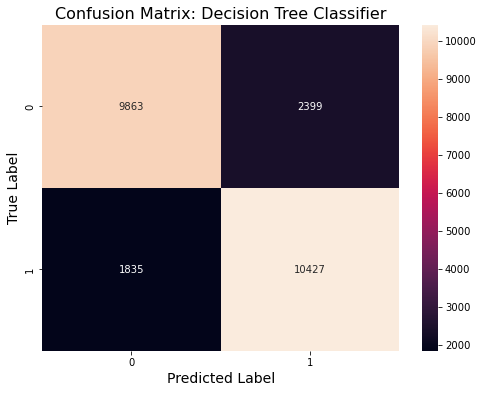

Accuracy Score: 82.74%
Recall Score: 85.04%
F1 Score: 83.12%


In [230]:
print("Classification report of Decision Tree Classifier:\n", report_dt)

cm_rf = confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix: Decision Tree Classifier",size=16)
sns.heatmap(cm_rf, annot=True,fmt='d')
plt.xlabel("Predicted Label",size=14)
plt.ylabel("True Label",size=14)
plt.show()

print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_dt)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_dt)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_dt)*100,2)))

### Conclusions:
1. Among the two models we built, Random Forest Classifier performs better as it predicted with 91.5% accuracy while the Decision Tree Classifier had an accuracy of 82.7%
2. Random Forest: 10625 defaulters predicted correctly and 11827 non-defaulters predicted correctly.
3. Decision Tree : 10427 defaulter predicted correctly amd 9863 non-defaulters predicted correctly.